# **Noisy Data(Outliers)**

*In statistics, an outlier is an observation point that is distant from other observations*

In a dataset sometimes there are some data which are different from other data of a column. These are outliers. The outliers affects the prediction of the model as it shows different behaviour than the other data. The outliers can be a result of a mistake during data collection or it can be just an indication of variance in your data.</br>

<p align="center">
  <img src="https://miro.medium.com/max/243/1*MnIW35xSxsSiVopfbE6SxA.png" />
</p>

For example in this data except player 3 everyone have 300+ scores. So here we can easily see that Player3 is an outlier.</br>

But detecting outliers are not that easy and neither removing them as there can be lakhs of rows and more than 20 columns. In that case we have to use some methods to detect outliers.</br>



# **Methods to detect outliers**

1. **Box Plot** </br>
<space>*In descriptive statistics, a box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points*</br>
<br>
<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png" />
</p>

In [ ]:
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt


boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names

#create the dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


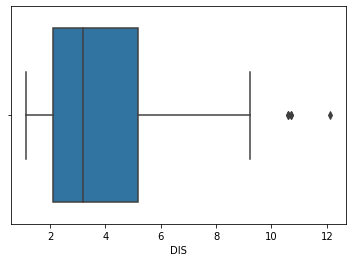

In [ ]:
import seaborn as sns
sns.boxplot(x=boston_df['DIS'])

2. **Scatter Plot**</br>
<space>*A scatter plot , is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis*</br>
<br>
<space>Using scatter plot you can do also multivariate outlier detection. Lets say the two columns "INDUS" and "TAX". Using scatter plot you can find the outlier of the relation between these two columns.

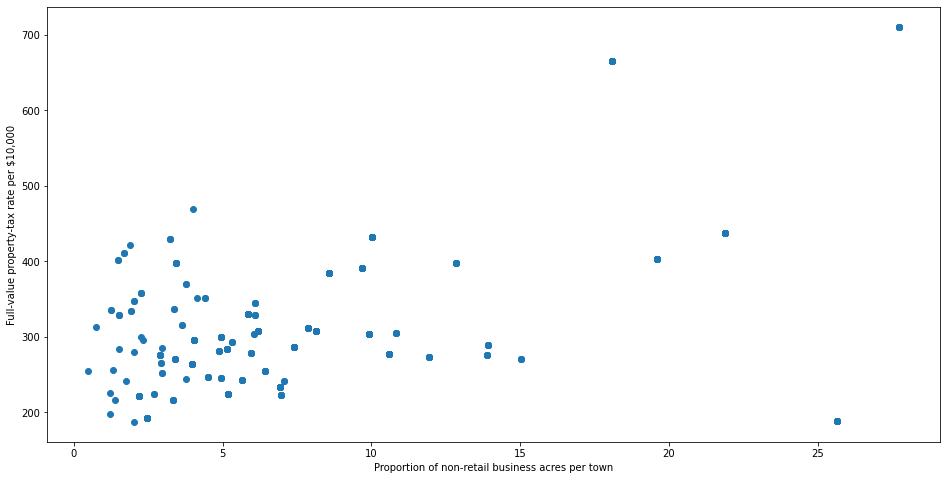

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

3. **Z-score**</br>
<space>*The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured*</br>
<br>
<p align="center">
  <img src="https://www.simplypsychology.org/Z-score-formula.jpg" />
</p>

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(boston_df))
print(z)

[[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


In [ ]:
threshold = 3
print(np.where(z > 3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

In [ ]:
print(z[55][1])

3.375038763517309


4. **IQR Score**</br>
<space>*The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1*</br>
<space>*In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data*</br>
<space> *It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers*

In [ ]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


In [ ]:
Q1 - 1.5 * IQR

CRIM        -5.310511
ZN         -18.750000
INDUS      -14.175000
CHAS         0.000000
NOX          0.186500
RM           4.778500
AGE        -28.550000
DIS         -2.532200
RAD        -26.000000
TAX       -301.500000
PTRATIO     13.200000
B          344.106250
LSTAT       -8.057500
dtype: float64

In [ ]:
Q3 + 1.5 * IQR

CRIM          9.069639
ZN           31.250000
INDUS        37.465000
CHAS          0.000000
NOX           0.886500
RM            7.730500
AGE         167.650000
DIS           9.820800
RAD          54.000000
TAX        1246.500000
PTRATIO      24.400000
B           427.496250
LSTAT        31.962500
dtype: float64

In [ ]:
print((boston_df < (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR)))

      CRIM     ZN  INDUS   CHAS    NOX  ...    RAD    TAX  PTRATIO      B  LSTAT
0    False  False  False  False  False  ...  False  False    False  False  False
1    False  False  False  False  False  ...  False  False    False  False  False
2    False  False  False  False  False  ...  False  False    False  False  False
3    False  False  False  False  False  ...  False  False    False  False  False
4    False  False  False  False  False  ...  False  False    False  False  False
..     ...    ...    ...    ...    ...  ...    ...    ...      ...    ...    ...
501  False  False  False  False  False  ...  False  False    False  False  False
502  False  False  False  False  False  ...  False  False    False  False  False
503  False  False  False  False  False  ...  False  False    False  False  False
504  False  False  False  False  False  ...  False  False    False  False  False
505  False  False  False  False  False  ...  False  False    False  False  False

[506 rows x 13 columns]


# **Removing Outliers**</br>
1. **Z-score**</br>
As we already have calculated Z-score we can now choose a limit of Z-score and extract rows according to that condition.</br>

In [ ]:
boston_df_o = boston_df[(z < 3).all(axis=1)]
print(boston_df_o)
print(boston_df.shape, boston_df_o.shape)

        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[415 rows x 13 columns]
(506, 13) (415,

2. **IQR Score**</br>
Similarly like Z-score using the IQR score we have calculated we will sample out the rows.

In [ ]:
boston_df_out = boston_df[~((boston_df < (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR))).any(axis=1)]
boston_df_out.shape

(274, 13)

3. **Robust Scaler**</br>
Using Robust Scaler also we can reduce outliers by scaling.

# **Feature Scaling**

One may have several questions while listening to this word:-

- What is feature scaling?
- Why is it necessary?
- What are the different types of Scaling?
- How are they different from each other in terms of effects on performance?

and so on ...........

Ques1:- **What is feature Scaling**?

Ans1-: In simple terms it defines a transformation of features from one vector space to another. For reference:-

<p align="center">
<img width=500 height=300 src="https://editor.analyticsvidhya.com/uploads/41951FEATURE%20SCALING%20IN%20PYTHON.png"/>
<img width=500 height=300 src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQfzHn72fYb9oCvySZakNdguuttdCkhAocxHEPWBOayzBCjQNyEqpaQTCzbSNHQfBc3hcY&usqp=CAU"/>
<img width=500 height=300 src="https://d1zx6djv3kb1v7.cloudfront.net/wp-content/media/2019/09/Feature-Scaling-i2tutorials.png"/>
<img width=500 height=300 src="https://michael-fuchs-python.netlify.app/post/2019-08-31-feature-scaling-with-scikit-learn_files/p18p10.png"/>
</p>

Ques2:- **Why is it necessary**?

Ans2:- There are several reasons to use scaling:-

**(a)** **```To supress the effect of Outliers```**:- Sometimes one way of dealing with data is to apply a scaling transformation on it, it will sometimes greatly reduces it's effect. For reference:-

<p align="center">
<img width=600 height=200 src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRiWWzJWZI_S1PCAR4I478FauKtPlGUoeobFA&usqp=CAU"/>
<img width=400 height=200 src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRlglBTnRSkvcoap1pzhXemSA5Cw1xAqebQag&usqp=CAU"/>
</p>


**(b)** **```To fasten the Optimization```**:- It is generally advised to scale all the features on same scale to fasten the gradient descent optimization (Applicable for those models who run GD like linear, logistic, NN)because

<p align="center">
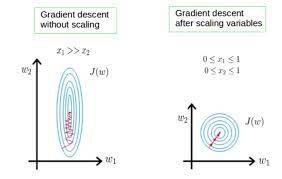
<img width=400 height=200 src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTkEfiYQ291KOB4kl8_TM8vYc2q0rsbLqybyg&usqp=CAU"/>
</p>



Ques3:- **What are the different types of Scaling?**

Ans3-: There are a bunch of scaling techniques used in Data Science community 
and most of them is in the sklearn library.

We will mention some of them:-

1. Standard Scaler:-
 ```python
 from sklearn.preprocessing import StandardScaler
 ```
Eqn:-
<p align="center">
<img src="https://cdn-images-1.medium.com/max/800/0*vQEjz0mvylP--30Q.GIF"/>
<img width=500 height=250 src="https://miro.medium.com/max/1400/1*bssNfrg7qHX_flK_6k2uFA.png"/>
</p>

2. MinMax Scaler:-
 ```python
 from sklearn.preprocessing import MinMaxScaler
 ```
Eqn:-
<p align="center">
<img src="http://androidkt.com/wp-content/uploads/2020/10/Selection_060.png"/>
</p>

3. Robust Scaler:-
 ```python
 from sklearn.preprocessing import RobustScaler
 ```
Eqn:-
<p align="center">
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200624151526/for4.png"/></br>
<img width=700 height=400 src="https://scikit-learn.org/0.18/_images/sphx_glr_plot_robust_scaling_thumb.png"/>
</p>


**In Summary:-**

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200519001052/2020-05-18-21.png"/>



[Sklearn Scaling resource](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)

**MIN MAX SCALING EXAMPLE**

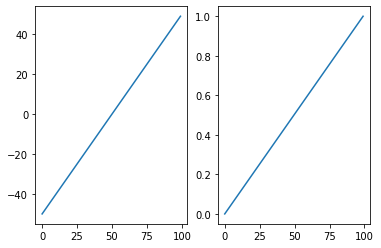

In [ ]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

a = np.arange(-50,50).reshape(-1,1)
a

b = MinMaxScaler().fit_transform(a)

plt.subplot(1,2,1)
plt.plot(a)
plt.subplot(1,2,2)
plt.plot(b)


Ques4:- **How they are different from eah other?**

Ans-: I will share some good pointers on this,

- When the data is og gaussian type then scale it using StandardScaler as your first choice.
- If the amount of outlier is big then use robust scaler as first choice.
- If non of the case is their then MinMax can be a good choice.


**There are many more good scalers present but i left it on you to explore by yourself and applying a scaler on a dataset is more of an art than a science, you need to try each and see their preformance.**

**----------------------------------------------------------**

# **Dataset Splitting**

Before starting the model training we need to split the dataset into two parts train dataset and test dataset. This is needed to check models performences on new data.

For this we can use train_test_split function of slkearn. Sometimes if there are any column of categorical values we can also use the stratify method to balance the frequency of the labels in both the train and test data. 

In [ ]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()
x = bc.data
y = bc.target
columns = bc.feature_names

#create the dataframe
bc_df = pd.DataFrame(bc.data)
bc_df.columns = columns
bc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
bc_df_target = pd.DataFrame(bc.target)
bc_df_target.columns = ["Target"]
bc_df_target.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(bc_df, bc_df_target, test_size=0.25)

In [ ]:
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(426, 30) (143, 30) (426, 1) (143, 1)


K-FOLD CROSS VALIDATION

In [ ]:
x1 = [1 2 3 4 5] w1
x2 = [1,2, 3,4, 5] w2